# Preparation

In [1]:
import numpy as np
from xml.etree import ElementTree
import cv2
from PIL import Image
import tensorflow as tf
import csv
import argparse
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import pickle
from matplotlib.colors import Normalize

%matplotlib inline

In [2]:
save_path = '/home/ubuntu/Sayama/tmpdir/2020_08_04/video1top_png/image_02/data/'


In [3]:
file_names=["frame_000939.png"]

#If you want to try all files, please execute below:
#for file in os.listdir(save_path):
    # Getting File Names
    #if os.path.isfile(os.path.join(save_path, file)):
        #file_names.append(os.path.basename(file))

In [4]:
file_names_2 = ["frame_000939"]

#If you want to try all files, please execute below:
#for file in os.listdir(save_path):
    #if os.path.isfile(os.path.join(save_path, file)):
        #file2 = file.rstrip('.png\n')
        #file_names_2.append(file2)

# Parameters for Abs Rel Error Calculation

In [5]:
min_depth=5
max_depth=80
bf=109.65
d_inf=2.67

# Check File Content

In [6]:
def draw_images(image_file):
    
    global save_path
    
    f_name=save_path+"/"+image_file
    gray_img=cv2.imread(f_name)
   

    
    
    return gray_img



frame_000939.png


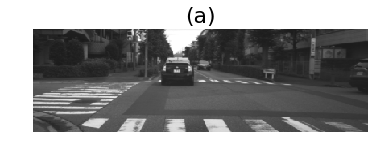

In [7]:
#Showing img
for number, image in enumerate(file_names[0:1]):
    print(image)
    gray_img = draw_images(image)
    plt.title("(a)", fontsize=22)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))


# Before fine tuning

In [8]:
depth_map_dir="/home/ubuntu/Sayama/result_video1top_273486/"
i=0
pred_depth=np.load(depth_map_dir+file_names_2[i] +'.npy')

In [9]:
pred_depth = cv2.resize(pred_depth, (416,128))

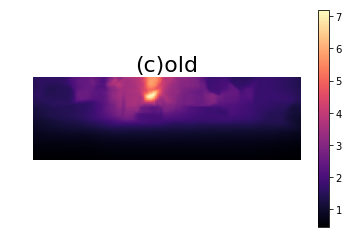

In [10]:
plt.imshow(pred_depth, cmap='magma')
plt.title("(c)old", fontsize=22)
plt.axis('off')
plt.colorbar()

In [11]:
# Answer Disparity Map Directory
ans_int_disp_map_dir="/home/ubuntu/Sayama/tmpdir/2020_08_04/video1middle_png/image_02/data"

In [12]:
def draw_images_ans_int(image_file):
    
    global ans_int_disp_map_dir
    
    f_name=ans_int_disp_map_dir+"/"+image_file
    ans_int_disp_map=cv2.imread(f_name)
    ans_int_disp_map=cv2.cvtColor(ans_int_disp_map, cv2.COLOR_RGB2GRAY)
   

    
    
    return ans_int_disp_map




frame_000939.png


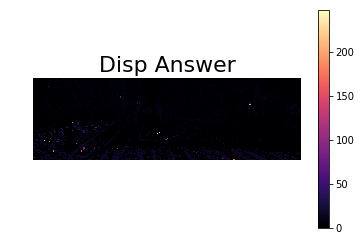

In [13]:
for number, image in enumerate(file_names[0:1]):
    print(image)
    ans_int_disp_map = draw_images_ans_int(image)
    #plt.figure(dpi=50)
    plt.imshow(ans_int_disp_map, cmap='magma')
    plt.title("Disp Answer", fontsize=22)
    plt.axis('off')
    plt.colorbar()

In [14]:
gt_depth=bf/(ans_int_disp_map-d_inf)

In [15]:
mask = np.logical_and(gt_depth>min_depth,gt_depth <max_depth)

In [16]:
gt_depth=gt_depth*mask

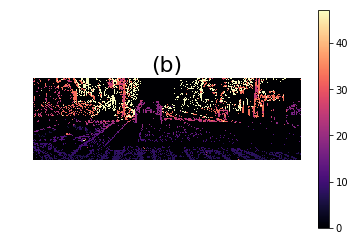

In [17]:
plt.imshow(gt_depth, cmap='magma')
plt.title("(b)", fontsize=22)
plt.axis('off')
plt.colorbar()

In [18]:
scalor = np.median(gt_depth[mask])/np.median(pred_depth[mask])

In [19]:
print(scalor)

15.070616436912356


In [20]:
pred_depth[mask] *= scalor

In [21]:
pred_depth[pred_depth < min_depth] = min_depth
pred_depth[pred_depth > max_depth] = max_depth

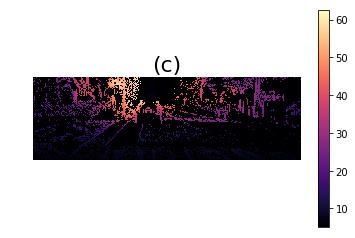

In [22]:
plt.imshow(pred_depth, cmap='magma')
plt.title("(c)", fontsize=22)
plt.axis('off')
plt.colorbar()

# After fine tuning

In [23]:
depth_map_dir="/home/ubuntu/Sayama/result_video1top_279296/"
i=0
pred_depth=np.load(depth_map_dir+file_names_2[i] +'.npy')

In [24]:
pred_depth = cv2.resize(pred_depth, (416,128))

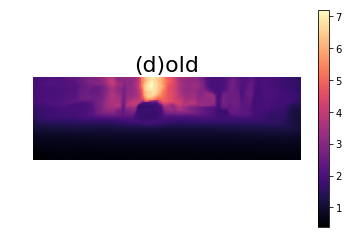

In [25]:
plt.imshow(pred_depth, cmap='magma')
plt.title("(d)old", fontsize=22)
plt.axis('off')
plt.colorbar()

In [26]:
# Answer Disparity Map Directory
ans_int_disp_map_dir="/home/ubuntu/Sayama/tmpdir/2020_08_04/video1middle_png/image_02/data"

In [27]:
def draw_images_ans_int(image_file):
    
    global ans_int_disp_map_dir
    
    f_name=ans_int_disp_map_dir+"/"+image_file
    ans_int_disp_map=cv2.imread(f_name)
    ans_int_disp_map=cv2.cvtColor(ans_int_disp_map, cv2.COLOR_RGB2GRAY)
   

    
    
    return ans_int_disp_map



frame_000939.png


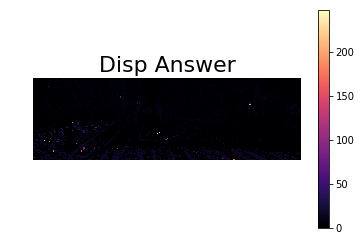

In [28]:
for number, image in enumerate(file_names[0:1]):
    print(image)
    ans_int_disp_map = draw_images_ans_int(image)
    #plt.figure(dpi=50)
    plt.imshow(ans_int_disp_map, cmap='magma')
    plt.title("Disp Answer", fontsize=22)
    plt.axis('off')
    plt.colorbar()

In [29]:
gt_depth=bf/(ans_int_disp_map-d_inf)

In [30]:
mask = np.logical_and(gt_depth>min_depth,gt_depth <max_depth)

In [31]:
gt_depth=gt_depth*mask

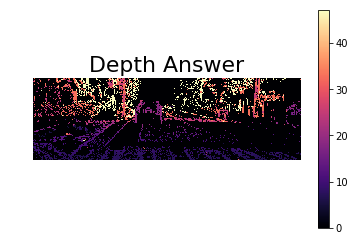

In [32]:

plt.imshow(gt_depth,cmap='magma')
plt.title("Depth Answer", fontsize=22)
plt.axis('off')
plt.colorbar()

In [33]:
scalor = np.median(gt_depth[mask])/np.median(pred_depth[mask])

In [34]:
print(scalor)

13.517394652031113


In [35]:
pred_depth[mask] *= scalor

In [36]:
pred_depth[pred_depth < min_depth] = min_depth
pred_depth[pred_depth > max_depth] = max_depth

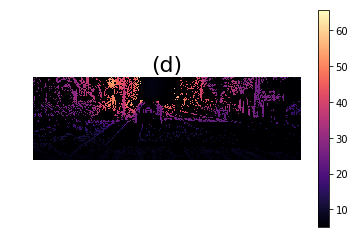

In [37]:
plt.imshow(pred_depth, cmap='magma')
plt.title("(d)", fontsize=22)
plt.axis('off')
plt.colorbar()

In [38]:
def compute_errors(gt, pred):
    thresh = np.maximum((gt / pred), (pred / gt))
    a1 = (thresh < 1.25   ).mean()
    a2 = (thresh < 1.25 ** 2).mean()
    a3 = (thresh < 1.25 ** 3).mean()

    rmse = (gt - pred) ** 2
    rmse = np.sqrt(rmse.mean())

    rmse_log = (np.log(gt) - np.log(pred)) ** 2
    rmse_log = np.sqrt(rmse_log.mean())

    abs_rel = np.mean(np.abs(gt - pred) / gt)
    
    sq_rel = np.mean(((gt - pred)**2) / gt)

    return abs_rel, sq_rel, rmse, rmse_log, a1, a2, a3

In [39]:
num_test=1
i=0

In [40]:
rms     = np.zeros(num_test, np.float32)
log_rms = np.zeros(num_test, np.float32)
abs_rel = np.zeros(num_test, np.float32)
sq_rel  = np.zeros(num_test, np.float32)
d1_all  = np.zeros(num_test, np.float32)
a1      = np.zeros(num_test, np.float32)
a2      = np.zeros(num_test, np.float32)
a3      = np.zeros(num_test, np.float32)
scalors = np.zeros(num_test, np.float32)

In [41]:
abs_rel[i], sq_rel[i], rms[i], log_rms[i], a1[i], a2[i], a3[i] = \
            compute_errors(gt_depth[mask], pred_depth[mask])

print("{:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10} ".format('abs_rel', 'sq_rel', 'rms', 'log_rms', 'd1_all', 'a1', 'a2', 'a3', 'scalor'))
print("{:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f} ,{:10.4f} ".format(abs_rel.mean(), sq_rel.mean(), rms.mean(), log_rms.mean(), d1_all.mean(), a1.mean(), a2.mean(), a3.mean(),scalors.mean()))


   abs_rel,     sq_rel,        rms,    log_rms,     d1_all,         a1,         a2,         a3,     scalor 
    0.1670,     1.6086,     7.1636,     0.2382,     0.0000,     0.7222,     0.9296,     0.9796 ,    0.0000 


# Scale Matching with acceleration value

In [42]:
depth_map_dir="/home/ubuntu/Sayama/result_video1top_279296/"
i=0
pred_depth=np.load(depth_map_dir+file_names_2[i] +'.npy')

In [43]:
pred_depth = cv2.resize(pred_depth, (416,128))

In [44]:
for number, image in enumerate(file_names[0:1]):
    print(image)
    ans_int_disp_map = draw_images_ans_int(image)

frame_000939.png


In [45]:
gt_depth=bf/(ans_int_disp_map-d_inf)

In [46]:
mask = np.logical_and(gt_depth>min_depth,gt_depth <max_depth)

In [47]:
gt_depth=gt_depth*mask

In [48]:
import math

In [49]:
def calc_center(xmin=0,ymin=0,img_height=128,img_width=416,clip_height=128,clip_width=416,dfv_height=128,dfv_width=416):
    center_ratio_x=(img_height//2-xmin)/clip_height
    center_ratio_y=(img_width//2-ymin)/clip_width
    center_x=int(dfv_height*center_ratio_x)
    center_y=int(dfv_width*center_ratio_y)
    return [center_x,center_y]

In [50]:
height=1.2
acceleration=0.065
theta=math.asin(acceleration)
truth_z=height/math.sin(theta)
print(truth_z)

18.46153846153846


In [51]:
center=calc_center()
present_z=pred_depth[center[0]][center[1]]
print(present_z)

1.9554828


In [52]:
scalor=truth_z/present_z
print(scalor)

9.440910489635908


In [53]:
pred_depth[mask] *= scalor

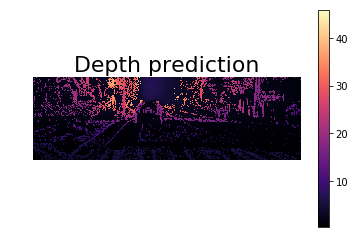

In [54]:
plt.imshow(pred_depth, cmap='magma')
plt.title("Depth prediction", fontsize=22)
plt.axis('off')
plt.colorbar()

In [55]:
pred_depth[pred_depth < min_depth] = min_depth
pred_depth[pred_depth > max_depth] = max_depth

In [56]:
abs_rel[i], sq_rel[i], rms[i], log_rms[i], a1[i], a2[i], a3[i] = compute_errors(gt_depth[mask], pred_depth[mask])

In [57]:
print("{:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10} ".format('abs_rel', 'sq_rel', 'rms', 'log_rms', 'd1_all', 'a1', 'a2', 'a3', 'scalor'))
print("{:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f} ,{:10.4f} ".format(abs_rel.mean(), sq_rel.mean(), rms.mean(), log_rms.mean(), d1_all.mean(), a1.mean(), a2.mean(), a3.mean(),scalors.mean()))



   abs_rel,     sq_rel,        rms,    log_rms,     d1_all,         a1,         a2,         a3,     scalor 
    0.3455,     3.8070,    11.8095,     0.4713,     0.0000,     0.1051,     0.6021,     0.9024 ,    0.0000 


# No Scale Matching

In [58]:
depth_map_dir="/home/ubuntu/Sayama/result_video1top_279296/"
i=0
pred_depth=np.load(depth_map_dir+file_names_2[i] +'.npy')

In [59]:
pred_depth = cv2.resize(pred_depth, (416,128))

In [60]:
for number, image in enumerate(file_names[0:1]):
    print(image)
    ans_int_disp_map = draw_images_ans_int(image)

frame_000939.png


In [61]:
gt_depth=bf/(ans_int_disp_map-d_inf)

In [62]:
mask = np.logical_and(gt_depth>min_depth,gt_depth <max_depth)

In [63]:
gt_depth=gt_depth*mask

In [64]:
scalor=1
print(scalor)

1


In [65]:
pred_depth[mask] *= scalor

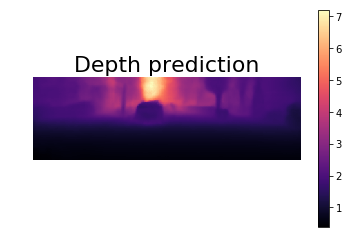

In [66]:
plt.imshow(pred_depth, cmap='magma')
plt.title("Depth prediction", fontsize=22)
plt.axis('off')
plt.colorbar()

In [67]:
pred_depth[pred_depth < min_depth] = min_depth
pred_depth[pred_depth > max_depth] = max_depth

In [68]:
abs_rel[i], sq_rel[i], rms[i], log_rms[i], a1[i], a2[i], a3[i] = compute_errors(gt_depth[mask], pred_depth[mask])

In [69]:
print("{:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10} ".format('abs_rel', 'sq_rel', 'rms', 'log_rms', 'd1_all', 'a1', 'a2', 'a3', 'scalor'))
print("{:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f} ,{:10.4f} ".format(abs_rel.mean(), sq_rel.mean(), rms.mean(), log_rms.mean(), d1_all.mean(), a1.mean(), a2.mean(), a3.mean(),scalors.mean()))




   abs_rel,     sq_rel,        rms,    log_rms,     d1_all,         a1,         a2,         a3,     scalor 
    0.6905,    16.8790,    25.0097,     1.5724,     0.0000,     0.0079,     0.1378,     0.2672 ,    0.0000 


# Vis All

In [70]:
depth_map_dir="/home/ubuntu/Sayama/result_video1top_273486/"
i=0
pred_depth=np.load(depth_map_dir+file_names_2[i] +'.npy')

In [71]:
pred_depth = cv2.resize(pred_depth, (416,128))

In [72]:
record=[]
record.append(pred_depth)

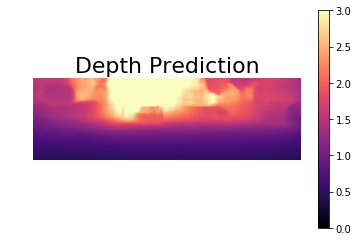

In [73]:
plt.imshow(record[0], vmin=0, vmax=3,cmap='magma')
plt.title("Depth Prediction", fontsize=22)
plt.axis('off')
plt.colorbar()

In [74]:
depth_map_dir="/home/ubuntu/Sayama/result_video1top_279296/"
i=0
pred_depth=np.load(depth_map_dir+file_names_2[i] +'.npy')

In [75]:
pred_depth = cv2.resize(pred_depth, (416,128))
record.append(pred_depth)

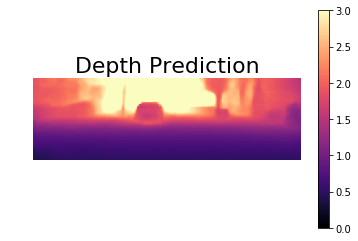

In [76]:
plt.imshow(record[1], vmin=0, vmax=3,cmap='magma')
plt.title("Depth Prediction", fontsize=22)
plt.axis('off')
plt.colorbar()

In [77]:
# Answer Disparity Map Directory
ans_int_disp_map_dir="/home/ubuntu/Sayama/tmpdir/2020_08_04/video1middle_png/image_02/data"

In [78]:
def draw_images_ans_int(image_file):
    
    global ans_int_disp_map_dir
    
    f_name=ans_int_disp_map_dir+"/"+image_file
    ans_int_disp_map=cv2.imread(f_name)
    ans_int_disp_map=cv2.cvtColor(ans_int_disp_map, cv2.COLOR_RGB2GRAY)
   

    
    
    return ans_int_disp_map




frame_000939.png


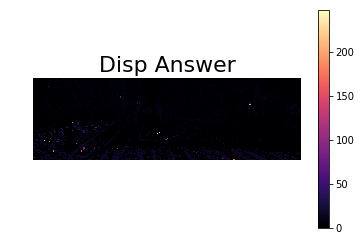

In [79]:
for number, image in enumerate(file_names[0:1]):
    print(image)
    ans_int_disp_map = draw_images_ans_int(image)
    #plt.figure(dpi=50)
    plt.imshow(ans_int_disp_map, cmap='magma')
    plt.title("Disp Answer", fontsize=22)
    plt.axis('off')
    plt.colorbar()

In [80]:
gt_depth=bf/(ans_int_disp_map-d_inf)

In [81]:
mask = np.logical_and(gt_depth>min_depth,gt_depth <max_depth)

In [82]:
gt_depth=gt_depth*mask

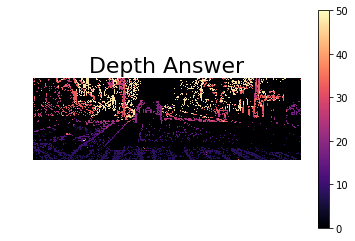

In [83]:
plt.imshow(gt_depth,vmin=0, vmax=50,cmap='magma')
plt.title("Depth Answer", fontsize=22)
plt.axis('off')
plt.colorbar()